In [1]:
from ase import Atoms
from ase.calculators.emt import EMT
from ase.db import connect
import clease

from clease.tools import update_db
from clease import Concentration
from clease import CEBulk
from clease import Evaluate
from clease import NewStructures
from clease.calculator import Clease
from clease.calculator import attach_calculator
from ase.eos import EquationOfState
import sys
from ase.constraints import StrainFilter
from ase.optimize import BFGS
from mpl_toolkits.mplot3d import Axes3D 

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#from clease.settings import CEBulk, Concentration
conc = Concentration(basis_elements=[['Au', 'Cu']])

import json
with open('eci_final.json') as json_file: 
    eci = json.load(json_file)

settings = CEBulk(crystalstructure='fcc',
                   a=4.09,
                   size=[8,4,4],
                   concentration=conc,
                   db_name="auni_ar.db",
                   max_cluster_size=4,
                   max_cluster_dia=[6.0, 4.5, 4.5])

atoms = settings.atoms.copy()
atoms = attach_calculator(settings, atoms=atoms, eci=eci)


In [3]:
from clease.montecarlo.observers import ConcentrationObserver
obs = ConcentrationObserver(atoms, element='Au')

In [4]:
from clease.montecarlo import SGCMonteCarlo
mc = SGCMonteCarlo(atoms, 50, symbols=['Au', 'Cu'])

In [5]:
from clease.montecarlo import BinnedBiasPotential
from clease.montecarlo import MetaDynamicsSampler

bias = BinnedBiasPotential(xmin=0.0 - (1.0/256), xmax=1.0 + (1.0/256), nbins=129, getter=obs)

In [17]:
def get_free_energy(t):
    mod = 10000
    obs = ConcentrationObserver(atoms, element='Au')
    bias = BinnedBiasPotential(xmin=0.0 - (1.0/256), xmax=1.0 + (1.0/256), nbins=129, getter=obs)
    while mod >= 0.0001:
        obs = ConcentrationObserver(atoms, element='Au')
        mc = SGCMonteCarlo(atoms, t, symbols=['Au', 'Cu'])
        meta_dyn = MetaDynamicsSampler(mc=mc, bias=bias, flat_limit=0.8, mod_factor=mod,
                                       fname='aucu_metadyn.json')
        meta_dyn.run(max_sweeps=20000)
        
        
        with open('aucu_metadyn.json', 'r') as f:
            data = json.load(f)
            #print(data)
        bias.from_dict(data['bias_pot'])
        
        mod /= 2
    
    concs = np.linspace(0,1.0,129)
    new_bias_values = np.zeros((129))
    tmp = -np.asarray(bias.values)
    for i in range(129):
        new_bias_values[i] = tmp[i] - ((concs[i])*(tmp[-1]) + (1-concs[i])*(tmp[0])    )
    return new_bias_values/128

    
        
    

In [ ]:
temps = np.linspace(200,1200,41)

pots = np.zeros((len(temps),129))

count = 0
for t in temps:
    pots[count,:] = get_free_energy(t)
    count += 1

Starting metadynamics sampling...
Writing result to aucu_metadyn.json every 30 sec
Results from metadynamics sampling written to aucu_metadyn.json
Starting metadynamics sampling...
Writing result to aucu_metadyn.json every 30 sec
Results from metadynamics sampling written to aucu_metadyn.json
Starting metadynamics sampling...
Writing result to aucu_metadyn.json every 30 sec
Results from metadynamics sampling written to aucu_metadyn.json
Starting metadynamics sampling...
Writing result to aucu_metadyn.json every 30 sec
Results from metadynamics sampling written to aucu_metadyn.json
Starting metadynamics sampling...
Writing result to aucu_metadyn.json every 30 sec
Results from metadynamics sampling written to aucu_metadyn.json
Starting metadynamics sampling...
Writing result to aucu_metadyn.json every 30 sec
Results from metadynamics sampling written to aucu_metadyn.json
Starting metadynamics sampling...
Writing result to aucu_metadyn.json every 30 sec
Results from metadynamics sampling 

200.0


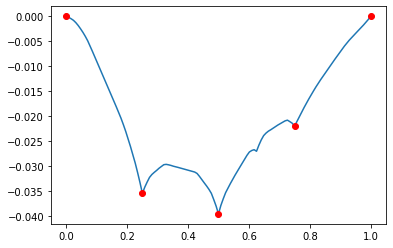

[0.0, 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 1.0]
225.0


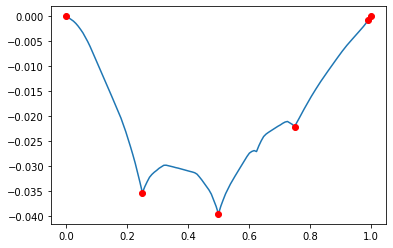

[0.0, 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 0.9921875]
250.0


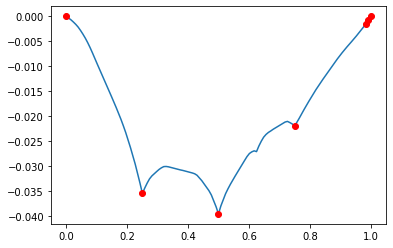

[0.0, 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 0.984375]
275.0


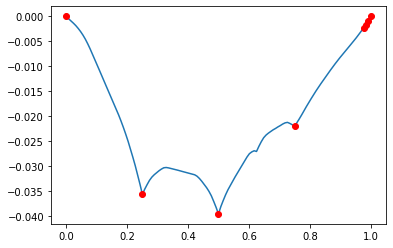

[0.0, 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 0.9765625]
300.0


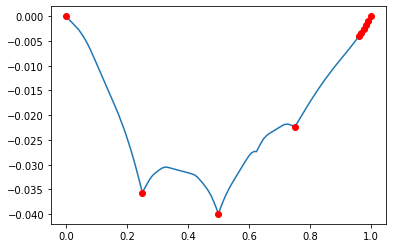

[0.0, 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 0.9609375]
325.0


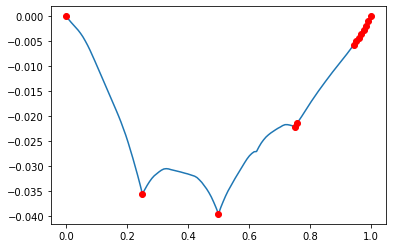

[0.0, 0.25, 0.25, 0.5, 0.5, 0.75, 0.7578125, 0.9453125]
350.0


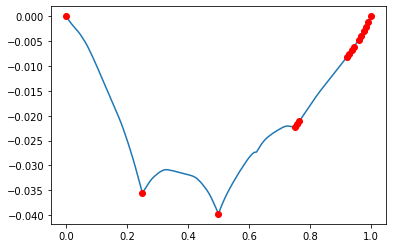

[0.0, 0.25, 0.25, 0.5, 0.5, 0.75, 0.765625, 0.921875]
375.0


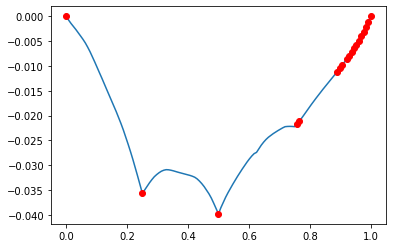

[0.0, 0.25, 0.25, 0.5, 0.5, 0.7578125, 0.765625, 0.890625]
400.0


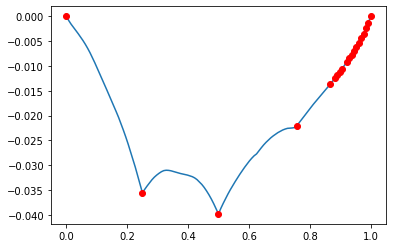

[0.0, 0.25, 0.25, 0.5, 0.5, 0.7578125, 0.7578125, 0.8671875]
425.0


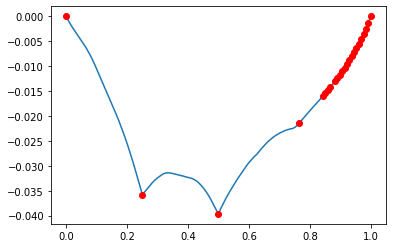

[0.0, 0.25, 0.25, 0.5, 0.5, 0.765625, 0.765625, 0.84375]
450.0


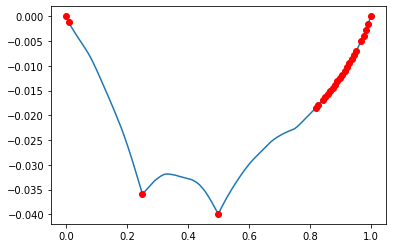

[0.0078125, 0.25, 0.25, 0.5, 0.5, 0.8203125]
475.0


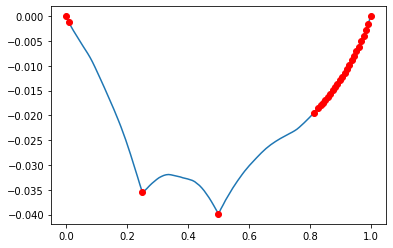

[0.0078125, 0.25, 0.25, 0.5, 0.5, 0.8125]
500.0


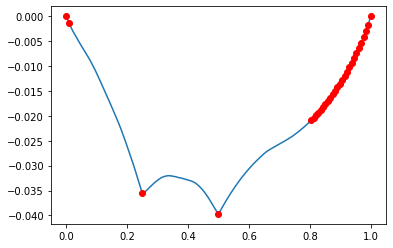

[0.0078125, 0.25, 0.25, 0.5, 0.5, 0.8046875]
525.0


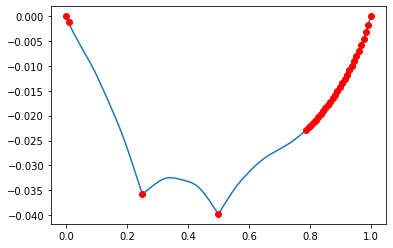

[0.0078125, 0.25, 0.25, 0.5, 0.5, 0.7890625]
550.0


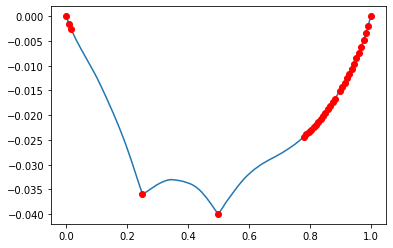

[0.015625, 0.25, 0.25, 0.5, 0.5, 0.78125]
575.0


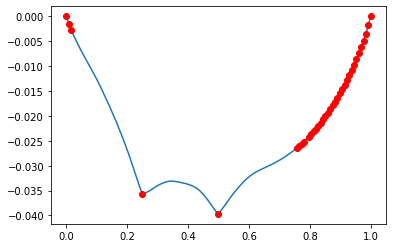

[0.015625, 0.25, 0.25, 0.5, 0.5, 0.7578125]
600.0


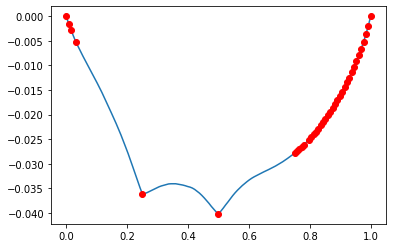

[0.03125, 0.25, 0.25, 0.5, 0.5, 0.75]
625.0


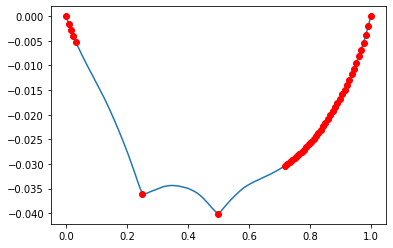

[0.03125, 0.25, 0.25, 0.5, 0.5, 0.71875]
650.0


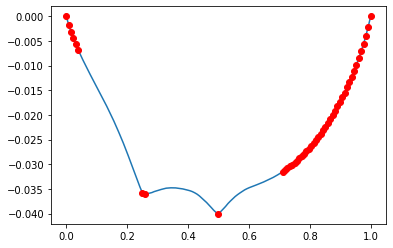

[0.0390625, 0.25, 0.2578125, 0.5, 0.5, 0.7109375]
675.0


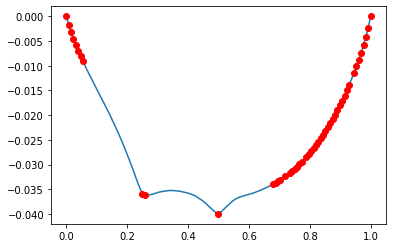

[0.0546875, 0.25, 0.2578125, 0.5, 0.5, 0.6796875]
700.0


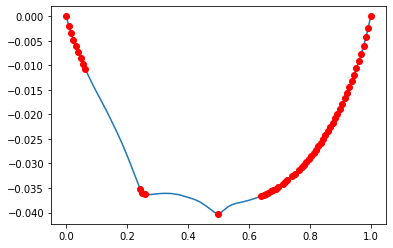

[0.0625, 0.2421875, 0.2578125, 0.5, 0.5, 0.640625]
725.0


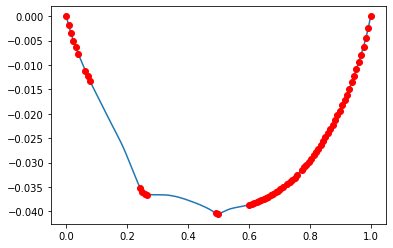

[0.078125, 0.2421875, 0.265625, 0.4921875, 0.5, 0.6015625]
750.0


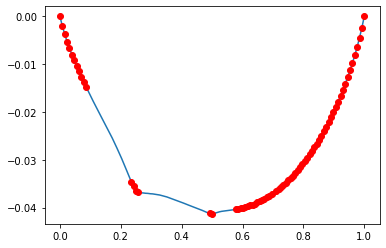

[0.0859375, 0.234375, 0.2578125, 0.4921875, 0.5, 0.578125]
775.0


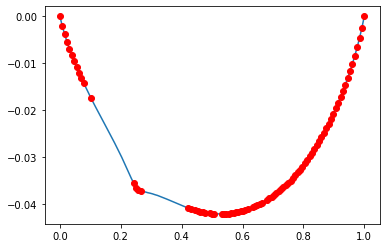

[0.1015625, 0.2421875, 0.265625, 0.421875]
800.0


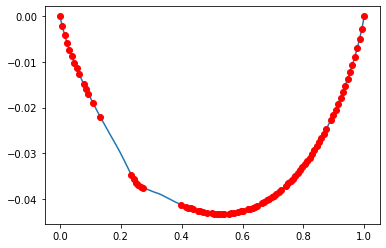

[0.1328125, 0.234375, 0.2734375, 0.3984375]
825.0


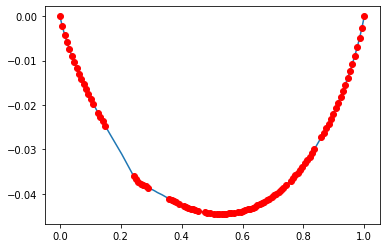

[0.1484375, 0.2421875, 0.2890625, 0.359375]
850.0


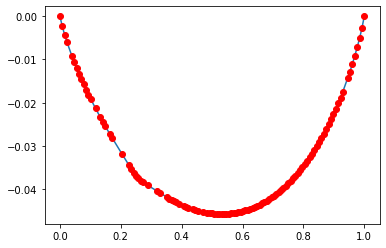

[]
875.0


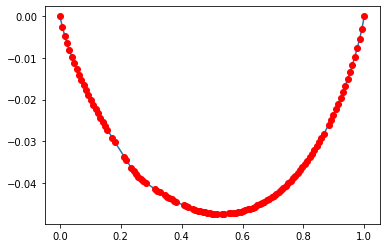

[]
900.0


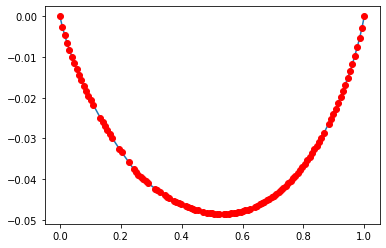

[]
925.0


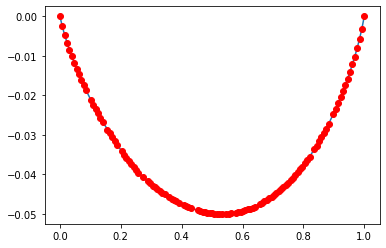

[]
950.0


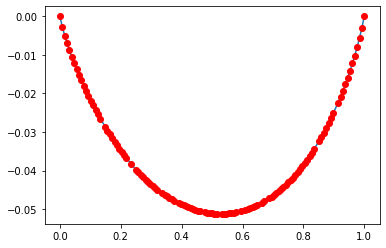

[]
975.0


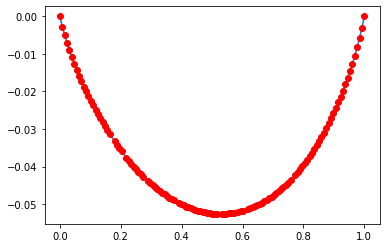

[]
1000.0


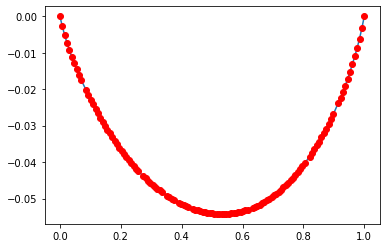

[]
1025.0


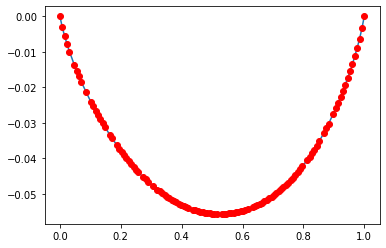

[]
1050.0


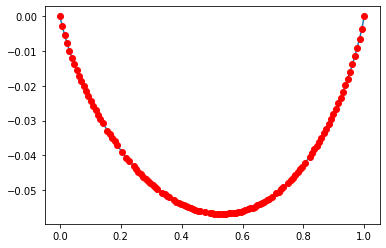

[]
1075.0


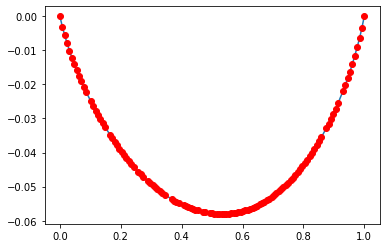

[]
1100.0


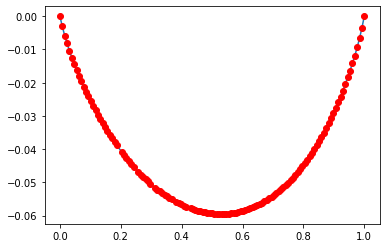

[]
1125.0


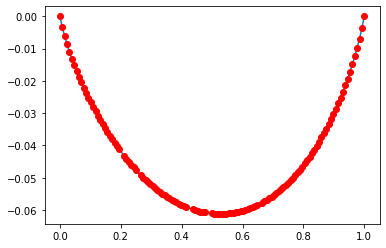

[]
1150.0


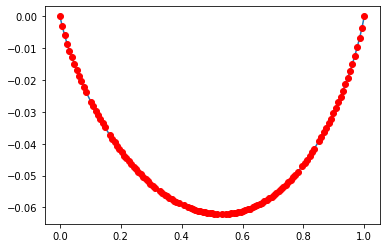

[]
1175.0


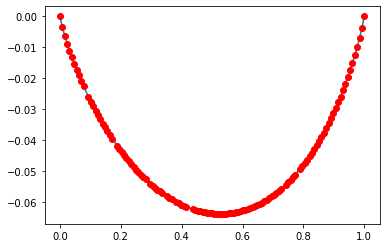

[]
1200.0


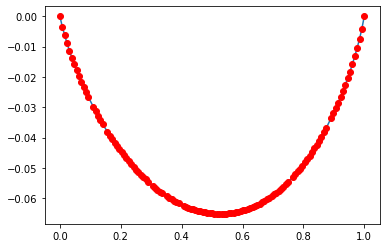

[]


In [26]:
from scipy.spatial import ConvexHull

boundaries = []

for ind in range(41):
    print(temps[ind])
    concs = np.linspace(0,1.0,129)
    plt.plot(concs,pots[ind,:])

    points = np.concatenate((concs.reshape(-1,1),pots[ind,:].reshape(-1,1)),axis = 1)
    hull = ConvexHull(points)


    plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'ro')

    plt.show()
    
    cutoff = concs[1]*7
    
    hull_points = points[hull.vertices,:]
    hull_points = np.sort(hull_points,axis=0)
    #print(hull_points)
    curr_boundary = []
    for j in range(1,hull.vertices.shape[0]):
        if (hull_points[j,0]-hull_points[j-1,0] > cutoff):
            curr_boundary.append(hull_points[j-1,0])
            curr_boundary.append(hull_points[j,0])
            
    print(curr_boundary)
    boundaries.append(curr_boundary)
    

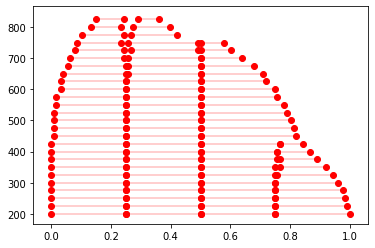

In [27]:
counter = 0
for t in temps:
    curr_temps = np.ones((2))*t
    curr_temps_b = np.ones((len(boundaries[counter])))*t
    for j in range(int(len(boundaries[counter])/2)):
        cb = []
        cb.append(boundaries[counter][2*j])
        cb.append(boundaries[counter][2*j+1])
        plt.plot(cb,curr_temps,color='red',alpha=0.25)
    plt.scatter(boundaries[counter],curr_temps_b,color='red')
    counter += 1
    
plt.show()

In [127]:
concs_AR = np.loadtxt(open("CuAu_128.csv", "rb"), delimiter=",", skiprows=0)


In [39]:
from scipy import interpolate

boundary_one = []
boundary_two = []
boundary_three = []
boundary_four = []
boundary_five = []
boundary_six = []
boundary_seven = []
boundary_top = []
boundary_right = []
boundary_ect = []
boundary_peri = []

boundary_cong_melt = []

counter = 0
for t in temps:
    if t <= 825:
        curr_point_one = [boundaries[counter][0],t]
        curr_point_two = [boundaries[counter][1],t]
        curr_point_three = [boundaries[counter][2],t]
        boundary_one.append(curr_point_one)
        boundary_two.append(curr_point_two)
        boundary_three.append(curr_point_three)
        
    if t <= 750:
        curr_point_right = [boundaries[counter][-1],t]
        boundary_right.append(curr_point_right)
        boundary_four.append([boundaries[counter][3],t])
        boundary_five.append([boundaries[counter][4],t])
        
    if t == 825:
        boundary_top.append([boundaries[counter][0],t])
        boundary_top.append([boundaries[counter][1],t])
        boundary_top.append([boundaries[counter][2],t])
        boundary_top.append([boundaries[counter][3],t])
        
    if t == 750:
        boundary_ect.append([boundaries[counter][-1],t])
        boundary_ect.append([boundaries[counter][-2],t])
        boundary_ect.append([boundaries[counter][-3],t])
        boundary_ect.append([boundaries[counter][-4],t])
        
    if t <= 425:
        boundary_six.append([boundaries[counter][4],t])
        boundary_seven.append([boundaries[counter][5],t])
        
    if t == 425:
        boundary_peri.append([boundaries[counter][-1],t])
        boundary_peri.append([boundaries[counter][-2],t])
        boundary_peri.append([boundaries[counter][-3]+0.000001,t])
        boundary_peri.append([boundaries[counter][-4],t])
        
    if t > 750 and t <= 825:
        boundary_cong_melt.append([boundaries[counter][-1],t])
        
    counter += 1
    
boundary_one = np.asarray(boundary_one)
tck, u = interpolate.splprep([boundary_one[:,0], boundary_one[:,1]], s=0)
new_points_one = interpolate.splev(u, tck)

boundary_two = np.asarray(boundary_two)
tck, u = interpolate.splprep([boundary_two[:,0], boundary_two[:,1]], s=0)
new_points_two = interpolate.splev(u, tck)

boundary_three = np.asarray(boundary_three)
tck, u = interpolate.splprep([boundary_three[:,0], boundary_three[:,1]], s=0)
new_points_three = interpolate.splev(u, tck)

boundary_right = np.asarray(boundary_right)
tck, u = interpolate.splprep([boundary_right[:,0], boundary_right[:,1]], s=0)
new_points_right = interpolate.splev(u, tck)

boundary_top = np.asarray(boundary_top)
tck, u = interpolate.splprep([boundary_top[:,0], boundary_top[:,1]], s=0)
new_points_top = interpolate.splev(u, tck)

boundary_ect = np.asarray(boundary_ect)
tck, u = interpolate.splprep([boundary_ect[:,0], boundary_ect[:,1]], s=0)
new_points_ect = interpolate.splev(u, tck)

boundary_four = np.asarray(boundary_four)
tck, u = interpolate.splprep([boundary_four[:,0], boundary_four[:,1]], s=0)
new_points_four = interpolate.splev(u, tck)

boundary_five = np.asarray(boundary_five)
tck, u = interpolate.splprep([boundary_five[:,0], boundary_five[:,1]], s=0)
new_points_five = interpolate.splev(u, tck)

boundary_six = np.asarray(boundary_six)
tck, u = interpolate.splprep([boundary_six[:,0], boundary_six[:,1]], s=0)
new_points_six = interpolate.splev(u, tck)

boundary_seven = np.asarray(boundary_seven)
tck, u = interpolate.splprep([boundary_seven[:,0], boundary_seven[:,1]], s=0)
new_points_seven = interpolate.splev(u, tck)

boundary_peri = np.asarray(boundary_peri)
tck, u = interpolate.splprep([boundary_peri[:,0], boundary_peri[:,1]], s=0)
new_points_peri = interpolate.splev(u, tck)


boundary_cong_melt = np.asarray(boundary_cong_melt)
tck, u = interpolate.splprep([boundary_cong_melt[:,0], boundary_cong_melt[:,1]], k=2,s=0)
new_points_cong_melt = interpolate.splev(u, tck)


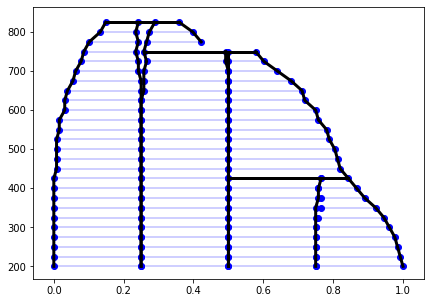

In [48]:
mpl.rc('font',family='Arial')
hfont = {'fontname':'Arial'}

counter = 0
temps = np.linspace(200,1200,41)

for t in temps:
    curr_temps = np.ones((2))*t
    curr_temps_b = np.ones((len(boundaries[counter])))*t
    for j in range(int(len(boundaries[counter])/2)):
        cb = []
        cb.append(boundaries[counter][2*j])
        cb.append(boundaries[counter][2*j+1])
        plt.plot(cb,curr_temps,color='blue',alpha=0.25)
    plt.scatter(boundaries[counter],curr_temps_b,color='blue')
    counter += 1
    
plt.plot(new_points_one[0],new_points_one[1],color='black', linewidth=3)
plt.plot(new_points_two[0],new_points_two[1],color='black', linewidth=3)
plt.plot(new_points_three[0],new_points_three[1],color='black', linewidth=3)
plt.plot(new_points_right[0],new_points_right[1],color='black', linewidth=3)
plt.plot(new_points_top[0],new_points_top[1],color='black', linewidth=3)
plt.plot(new_points_ect[0],new_points_ect[1],color='black', linewidth=3)
plt.plot(new_points_four[0],new_points_four[1],color='black', linewidth=3)
plt.plot(new_points_five[0],new_points_five[1],color='black', linewidth=3)
plt.plot(new_points_six[0],new_points_six[1],color='black', linewidth=3)
plt.plot(new_points_seven[0],new_points_seven[1],color='black', linewidth=3)
plt.plot(new_points_peri[0],new_points_peri[1],color='black', linewidth=3)
plt.plot(new_points_cong_melt[0],new_points_cong_melt[1],color='black', linewidth=3)

In [130]:
plotter_temps = np.loadtxt(open("plotter_temps_june6_2.csv", "rb"), delimiter=",", skiprows=0)
plotter_concs = np.loadtxt(open("plotter_concs_june6_2.csv", "rb"), delimiter=",", skiprows=0)

plotter_temps_mid = np.loadtxt(open("plotter_temps_mid_june6_2.csv", "rb"), delimiter=",", skiprows=0)
plotter_concs_mid = np.loadtxt(open("plotter_concs_mid_june6_2.csv", "rb"), delimiter=",", skiprows=0)

path_x = np.loadtxt(open("Top_x_june6_2.csv", "rb"), delimiter=",", skiprows=0)
path_y = np.loadtxt(open("Top_Y_june6_2.csv", "rb"), delimiter=",", skiprows=0)

In [60]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#003f5c
#58508d
#bc5090
#ff6361
#ffa600
N = 5
newcolors = []
newcolors.append((0,63,92))
newcolors.append((88,80,141)) 
newcolors.append((188,80,144)) 
newcolors.append((255,99,97)) 
newcolors.append((255,166,0)) 

newcolors_norm = []
for i in newcolors:
    curr = np.asarray(i)
    print(curr)
    curr = curr/255.0
    curr = tuple(curr)
    newcolors_norm.append(curr)

cmap_name = 'my_list'
newcmp = LinearSegmentedColormap.from_list(cmap_name,newcolors_norm)

[ 0 63 92]
[ 88  80 141]
[188  80 144]
[255  99  97]
[255 166   0]


In [77]:
class AnyObjectHandler(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        l1 = plt.Line2D([x0,y0+width], [0.7*height,0.7*height], 
                                                linestyle='--', color='k')
        l2 = plt.Line2D([x0,y0+width], [0.3*height,0.3*height], color='r')
        return [l1, l2]

In [111]:
import six
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.legend_handler import HandlerLineCollection
import matplotlib.collections as mcol
from matplotlib.lines import Line2D

class HandlerDashedLines(HandlerLineCollection):
    """
    Custom Handler for LineCollection instances.
    """
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        # figure out how many lines there are
        numlines = len(orig_handle.get_segments())
        xdata, xdata_marker = self.get_xdata(legend, xdescent, ydescent,
                                             width, height, fontsize)
        leglines = []
        # divide the vertical space where the lines will go
        # into equal parts based on the number of lines
        ydata = ((height) / (numlines + 1)) * np.ones(xdata.shape, float)
        # for each line, create the line at the proper location
        # and set the dash pattern
        for i in range(numlines):
            legline = Line2D(xdata, ydata * (numlines - i) - ydescent)
            self.update_prop(legline, orig_handle, legend)
            # set color, dash pattern, and linewidth to that
            # of the lines in linecollection
            try:
                color = orig_handle.get_colors()[i]
            except IndexError:
                color = orig_handle.get_colors()[0]
            try:
                dashes = orig_handle.get_dashes()[i]
            except IndexError:
                dashes = orig_handle.get_dashes()[0]
            try:
                lw = orig_handle.get_linewidths()[i]
            except IndexError:
                lw = orig_handle.get_linewidths()[0]
            if dashes[0] is not None:
                legline.set_dashes(dashes[1])
            legline.set_color(color)
            legline.set_transform(trans)
            legline.set_linewidth(3.0)
            leglines.append(legline)
        return leglines

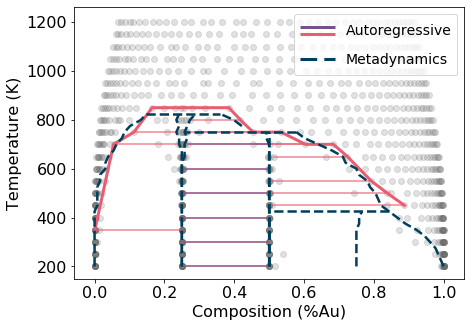

In [131]:
import matplotlib as mpl
from matplotlib.legend_handler import HandlerTuple

#from matplotlib.legend_handler import HandlerDashedLines

mpl.rc('font',family='Arial')
hfont = {'fontname':'Arial'}
plt.rcParams["figure.figsize"] = (7,5)

c0 = 'dimgrey'
cl = newcmp(0.0)
c2 = newcmp(0.66666)

counter = 0
temps = np.linspace(200,1200,41)

for t in temps:
    curr_temps = np.ones((2))*t
    curr_temps_b = np.ones((len(boundaries[counter])))*t
    for j in range(int(len(boundaries[counter])/2)):
        cb = []
        cb.append(boundaries[counter][2*j])
        cb.append(boundaries[counter][2*j+1])
        #plt.plot(cb,curr_temps,color='red',alpha=0.25)
    #plt.scatter(boundaries[counter],curr_temps_b,color='orange')
    counter += 1
    
counter = 0
temps = np.linspace(200,1200,21)
for t in temps:
    if (counter < concs_AR.shape[0]):
        curr_temps = np.ones((41))*(t)
        plt.scatter(concs_AR[counter,:],curr_temps,color=c0,alpha=0.2)
    
    counter += 1
    
#plt.hlines(663,0.0,1.0,color='green')
#plt.hlines(683,0.0,1.0,color='green')


for i in range(len(plotter_concs)):
    plt.plot(plotter_concs[i],plotter_temps[i],color=c2,alpha=0.75)
    #plt.scatter(plotter_concs[i],plotter_temps[i],color='orange',alpha=1.0)
    
for i in range(len(plotter_concs_mid)):
    if i == 0:
        p1 = plt.plot(plotter_concs_mid[i],plotter_temps_mid[i],color=newcmp(0.3333),alpha=0.75)
    else:
        plt.plot(plotter_concs_mid[i],plotter_temps_mid[i],color=newcmp(0.3333),alpha=0.75)
p2 = plt.plot(path_x,path_y, color=c2,linewidth=3,label="Autoregressive")



plt.plot(new_points_one[0],new_points_one[1],"--",color=cl, linewidth=2.5)
plt.plot(new_points_two[0],new_points_two[1],"--",color=cl, linewidth=2.5)
plt.plot(new_points_three[0],new_points_three[1],"--",color=cl, linewidth=2.5)
plt.plot(new_points_right[0],new_points_right[1],"--",color=cl, linewidth=2.5)
plt.plot(new_points_top[0],new_points_top[1],"--",color=cl, linewidth=2.5)
plt.plot(new_points_ect[0],new_points_ect[1],"--",color=cl, linewidth=2.5)
plt.plot(new_points_four[0],new_points_four[1],"--",color=cl, linewidth=2.5)
plt.plot(new_points_five[0],new_points_five[1],"--",color=cl, linewidth=2.5)
plt.plot(new_points_six[0],new_points_six[1],"--",color=cl, linewidth=2.5)
plt.plot(new_points_seven[0],new_points_seven[1],"--",color=cl, linewidth=2.5)
plt.plot(new_points_peri[0],new_points_peri[1],"--",color=cl, linewidth=2.5)
p3 = plt.plot(new_points_cong_melt[0],new_points_cong_melt[1],"--",color=cl, linewidth=2.5,label="Metadynamics")


plt.ylabel("Temperature (K)",fontsize=16,fontname="Arial")
plt.xlabel("Composition (%Au)",fontsize=16,fontname="Arial")

plt.xticks(fontsize = 16,fontname = "Arial")
plt.yticks(fontsize = 16,fontname = "Arial")

#plt.legend([object], ['label'],
           #handler_map={object: AnyObjectHandler()},prop={'family': 'Arial','size':14},loc=1)

#plt.legend(prop={'family': 'Arial','size':14},loc=1)
colors = [newcmp(0.333333),newcmp(0.666666)]
styles = ['solid','solid']
lines = []
line = [[(0, 0)]]
# set up the proxy artist
lc = mcol.LineCollection(2 * line, linestyles=styles, colors=colors)

colors_2 = [newcmp(0.0)]
styles_2 = ['dashed']
lines_2 = []
line_2 = [[(0, 0)]]
# set up the proxy artist
lc_2 = mcol.LineCollection(1 * line, linestyles=styles_2, colors=colors_2)

plt.legend(prop={'family': 'Arial','size':14},loc=1)

plt.legend([(lc),(lc_2)], [('Autoregressive'),("Metadynamics")], handler_map={type(lc): HandlerDashedLines(),type(lc_2): HandlerDashedLines()},
           handlelength=2.5, handleheight=2,prop={'family': 'Arial','size':14},loc=1)


#plt.savefig('CuAuMeta_June6_2.pdf',bbox_inches='tight')


plt.show()